# COMS4062A - Probabilistic Graphical Models
# Assignment
# Heart disease/failure prediction using Bayesian Networks
# Luca von Mayer 2427051@students.wits.ac.za



# Section 1: Data Handling 

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

Reading in data

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


Dataset info

In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


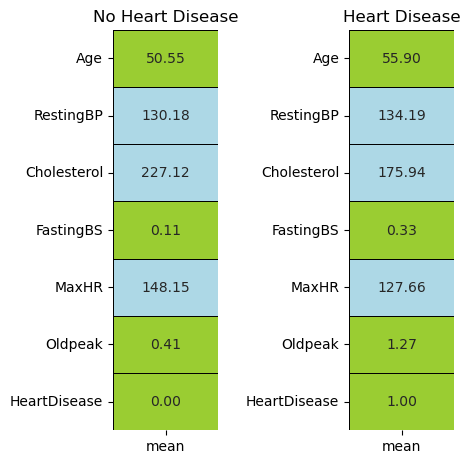

In [6]:
color_palette = ['#9ACD32', '#ADD8E6']

yes_heart = data[data['HeartDisease'] == 1].describe().T
no_heart = data[data['HeartDisease'] == 0].describe().T

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

plt.subplot(1, 2, 1)
sns.heatmap(no_heart[['mean']], annot=True, cmap=color_palette, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

plt.subplot(1, 2, 2)
sns.heatmap(yes_heart[['mean']], annot=True, cmap=color_palette, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')


figure.tight_layout(pad=2)


Target Visualization

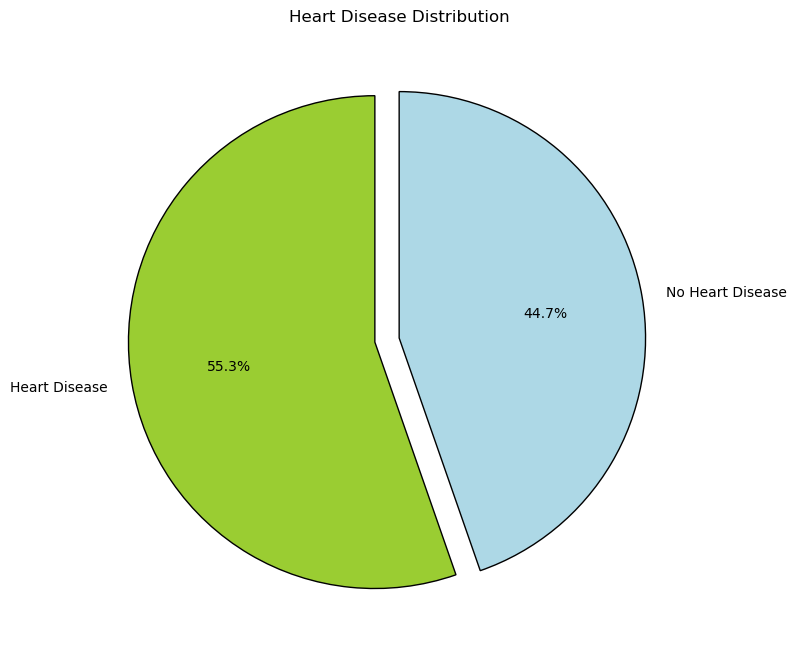

In [7]:
heart_counts = list(data['HeartDisease'].value_counts())
heart_percentages = [count / sum(heart_counts) * 100 for count in heart_counts]

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(heart_percentages, labels=['Heart Disease', 'No Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=color_palette, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease Distribution')
plt.show()


Divide into categorical and nummerical

In [8]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print(numerical_features)
print(categorical_features)

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


Label Encoding

In [9]:
le = LabelEncoder()
dataProcessed = data.copy(deep = True)

dataProcessed['Sex'] = le.fit_transform(dataProcessed['Sex'])
dataProcessed['ChestPainType'] = le.fit_transform(dataProcessed['ChestPainType'])
dataProcessed['RestingECG'] = le.fit_transform(dataProcessed['RestingECG'])
dataProcessed['ExerciseAngina'] = le.fit_transform(dataProcessed['ExerciseAngina'])
dataProcessed['ST_Slope'] = le.fit_transform(dataProcessed['ST_Slope'])

dataProcessed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


Data scaling

In [10]:
mms = MinMaxScaler() # Normalization

dataProcessed['Oldpeak'] = mms.fit_transform(dataProcessed[['Oldpeak']])
dataProcessed['Age'] = mms.fit_transform(dataProcessed[['Age']])
dataProcessed['RestingBP'] = mms.fit_transform(dataProcessed[['RestingBP']])
dataProcessed['Cholesterol'] = mms.fit_transform(dataProcessed[['Cholesterol']])
dataProcessed['MaxHR'] = mms.fit_transform(dataProcessed[['MaxHR']])

dataProcessed.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.24,1,1,0.70,0.48,0,1,0.79,0,0.30,2,0
1,0.43,0,2,0.80,0.30,0,1,0.68,0,0.41,1,1
2,0.18,1,1,0.65,0.47,0,2,0.27,0,0.30,2,0
3,0.41,0,0,0.69,0.35,0,1,0.34,1,0.47,1,1
4,0.53,1,2,0.75,0.32,0,1,0.44,0,0.30,2,0


Feature Selection for Categorical Features

Chi Squared Test

In [11]:
features = dataProcessed.loc[:,categorical_features[:-1]]
target = dataProcessed.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

featureScores

,Chi Squared Score
Sex,18.01
ChestPainType,160.74
FastingBS,50.30
RestingECG,1.22
ExerciseAngina,133.64
ST_Slope,77.49


Feature Selection for Numerical Features

ANOVA Test

In [12]:
features = dataProcessed.loc[:,numerical_features]
target = dataProcessed.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

featureScores

,ANOVA Score
Age,79.16
RestingBP,10.73
Cholesterol,52.46
MaxHR,174.91
Oldpeak,178.62


Missing values

In [13]:
miss = data.isnull().sum()
miss

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Identifying and removing outliers

Discritise features

In [14]:
for feature in numerical_features:
    dataProcessed[feature] = pd.cut(dataProcessed[feature], bins=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 1, 2, 3, 4], include_lowest=True)

dataProcessed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,1,3,2,0,1,3,0,1,2,0
1,2,0,2,3,1,0,1,3,0,2,1,1
2,0,1,1,3,2,0,2,1,0,1,2,0
3,2,0,0,3,1,0,1,1,1,2,1,1
4,2,1,2,3,1,0,1,2,0,1,2,0


Save new file

In [15]:
dataProcessed.to_csv("heartProcessed.csv", index=False)